#INDIA COVID-19 DASHBOARD
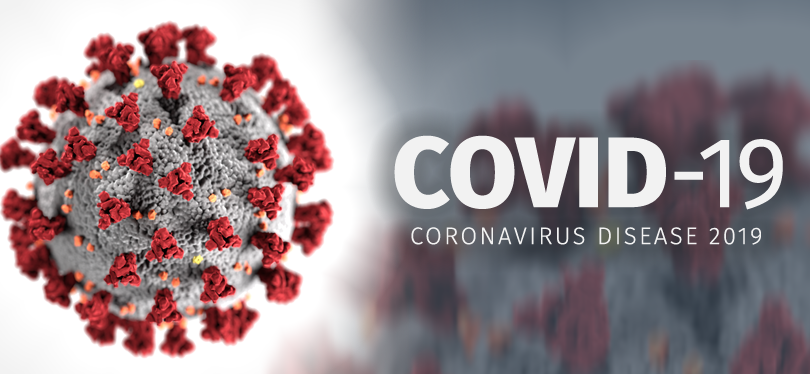


The first case of the COVID-19 pandemic in the Indian state of Karnataka was confirmed on 9 March 2020. Two days later, the state became the first in India to invoke the provisions of the Epidemic Diseases Act, 1897, which are set to last for a year, to curb the spread of the disease As of 9 June , there have been 11,005 (26 June 2020) confirmed cases with 6,916 (26 June 2020) recoveries and 181 (26 June 2020) deaths in the state

In [44]:
#Karnataka districts
lat=[16.1691,15.1394,15.8497,13.2847,12.9700,17.9104,11.9261,13.4355,13.3161,14.2251,12.8438,14.4644,15.4589,15.4315,13.0033,14.7951,17.3297,12.3375,13.1362,15.3505,12.5218,12.2958,0.0,16.2160,12.7209,13.9299,13.3379,13.3409,14.7937,16.8302,16.7626]
long=[75.6615,76.9214,74.4977,77.6078,77.6536,77.5199,76.9437,77.7315,75.7720,76.3980,75.2479,75.9218,75.0078,75.6355,76.1004,75.3991,76.8343,75.8069,78.1291,76.1567,76.8951,76.6394,0.0,77.3566,77.2799,75.5681,77.1173,74.7421,74.6869,75.7100,77.1442]

In [45]:
#Indian States
lati=[11.7401,15.9129,28.2180,26.2006,25.0961,30.7333,21.2787,20.42,28.7041,15.2993,22.2587,29.0588,31.1048,33.7782,23.6102,15.317277,10.8505,34.209515,22.9734,19.7515,24.6637,25.4670,23.1645,26.1584,20.9517,11.9416,31.1471,27.0238,27.5330,11.1271,18.1124,23.9408,30.0668,26.8467,22.9868]
longi=[92.6586,79.7400,94.7278,92.9376,85.3131,76.7794,81.8661, 72.83,77.1025,74.1240,71.1924,76.0856,77.1734,76.5762,85.2799,75.713890,76.2711,77.615112,78.6569,75.7139,93.9063,91.3662,92.9376,94.5624,85.0985,79.8083,75.3412,74.2179,88.5122,78.6569,79.0193,91.9882,79.0193,80.9462, 87.8550]

In [46]:
import numpy as np
import plotly.express as px
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import plotly.graph_objects as go

In [47]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tabulate import tabulate

def get_state_df():
    url = "https://www.karnataka.com/govt/district-wise-covid-19-cases/"
    page = requests.get(url)

    content = page.content

    soup = BeautifulSoup(content, "html5lib")

    cases_table = soup.find('table', attrs={'id':"info-table"})
    rows = cases_table.find_all('tr')

    headers = [header.text for header in rows[0].find_all('th')]

    elimination = [0]

    def extract_row(row, header):
      data = [td.text for td in row.find_all('td')]
      return dict(zip(headers,data))

    cases = [extract_row(row, headers)for (i,row) in enumerate(rows) if not i in elimination  ]

    df = pd.DataFrame(cases)

    for i in range(1, len(headers)):
        l = []

        for num in df[headers[i]]:
            if not "," in num:
                l.append(int(num))
            else:
                loc = num.find(",")
                l.append(int(num[:loc] + num[loc+1:]))

        df[headers[i]] = l

#     df.sort_values("Total Confirmed Cases", ascending = False, inplace = True)
    
#     return df.to_csv(r'Names.csv')
    return df


In [48]:
district_df=get_state_df()
district_df['lat']=lat
district_df['long']=long
district_df.sort_values("Total Confirmed Cases", ascending = False, inplace = True)
# district_df

In [49]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from tabulate import tabulate

def get_df():
    url = "https://www.mohfw.gov.in/"
    page = requests.get(url)

    content = page.content

    soup = BeautifulSoup(content, "html5lib")

    state_section = soup.find('section', attrs={'id':"state-data"})
    cases_table = state_section.find('table')
    rows = cases_table.find_all('tr')
    headers = [header.text for header in rows[0].find_all('th')]
    ap = []
    for td in rows[1].find_all('td'):
      ap.append(td.text)
    dict(zip(headers, ap))
    elimination = [0,36, 37, 38, 39, 40, 41]
    def extract_row(row, header):
      data = [td.text for td in row.find_all('td')]
      return dict(zip(headers,data))
    cases = []
    for i, row in enumerate(rows):
      if i not in elimination:
        cases.append(extract_row(row, headers))
      else:
        pass

    df = pd.DataFrame(data=cases)
    df.drop(columns = ["S. No."], inplace = True)
    df.columns = range(5)

    d = {0 : "Total"}
    for i in range(1, 5):
        df[i] = [int(i) for i in df[i]]
        d[i] = sum(df[i])

    df = df.append(d, ignore_index= True)

    df.columns = ["State/Region", "Active", "Recovered", "Deceased", "Total"]
    return df


In [58]:
data=get_df()
india_df=data.drop([35])
india_df['lat']=lati
india_df['long']=longi
india_df.sort_values("Total", ascending = False, inplace = True)

#Current statistics of India

In [61]:
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col1(x):
  r='background-color:red'
  p='background-color:purple'
  g='background-color:grey'
  temp_df1=pd.DataFrame('',index=x.index,columns=x.columns)
  temp_df1.iloc[:,1]=p
  temp_df1.iloc[:,2]=g
  temp_df1.iloc[:,3]=r
  return temp_df1

def show_latest_cases(n):
    n = int(n)
    return india_df.sort_values('Total', ascending= False).head(n).style.apply(highlight_col1, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [59]:
# total number of confirmed, death and recovered cases
India_total = int(india_df['Total'].sum())
India_deaths_total = int(india_df['Deceased'].sum())
India_recovered_total = int(india_df['Recovered'].sum())
India_active_total = int(india_df['Active'].sum())

In [60]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Active: "  + str(India_active_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(India_deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(India_recovered_total) + "</span>"+
             "</div>")
       )

In [83]:
#Bubble view of every state current statistics

In [84]:

fig=px.scatter(india_df.head(10),x='State/Region',y='Total',size='Total',
               color='State/Region',hover_name='State/Region',size_max=60)
fig.update_layout()
fig.show()


In [ ]:
#Total number of Active and death

In [85]:
px.bar(
    india_df.head(10),
    x = "State/Region",
    y = "Deceased",
    title= "Top 10 worst affected States based on number of deaths", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [66]:
px.bar(
    india_df.head(10),
    x = "State/Region",
    y = "Total",
    title= "Top 10 worst affected States", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [67]:
px.bar(
    india_df.head(10),
    x = "State/Region",
    y = "Recovered",
    title= "Top 10 states with the recovered statistics", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [86]:
#MAP VIEW OF CURRENT STATUS IN EVERY STATES IN INDIA

In [82]:
import folium
india_map=folium.Map(location=[20.5937, 78.9629],tiles='cartodbpositron',zoom_start=4,max_zoom=11,min_zoom=2)
for i in range(len(india_df)):
  folium.Circle(
      location=[india_df.iloc[i]['lat'],india_df.iloc[i]['long']],
      fill=True,
      radius=(int((np.log((india_df.iloc[i,4])+1.00001)))+0.2)*2000,
      fill_color='blue',
      color='red',
       tooltip = "<div style='margin: 0;padding:15px; background-color: indigo; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+india_df.iloc[i]['State/Region'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Total cases: "+str(india_df.iloc[i,4])+"</li>"+
                         "<li>Active:   "+str(india_df.iloc[i,1])+"</li>"+
                        "<li>Recovered:   "+str(india_df.iloc[i,2])+"</li>"+
      "<li>Deaths:   "+str(india_df.iloc[i,3])+"</li>"+
#                         "<li>Death Rate: "+ str(np.round(india_df.iloc[i,-2]/(india_df.iloc[i,1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(india_map)
  
india_map

In [ ]:
#INDIA COVID-19 DASHBOARD

In [55]:
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
  r='background-color:red'
  p='background-color:purple'
  g='background-color:grey'
  temp_df=pd.DataFrame('',index=x.index,columns=x.columns)
  temp_df.iloc[:,2]=p
  temp_df.iloc[:,3]=g
  temp_df.iloc[:,4]=r
  return temp_df

def show_latest_cases(n):
    n = int(n)
    return district_df.sort_values('Total Confirmed Cases', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [ ]:
px.bar(
    india_df.head(10),
    x = "State/Region",
    y = "",
    title= "Top 10 worst affected States", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [53]:
# total number of confirmed, death and recovered cases
confirmed_total = int(district_df['Total Confirmed Cases'].sum())
deaths_total = int(district_df['Total Death'].sum())
recovered_total = int(district_df['Total Recovered'].sum())
active_total = int(district_df['Active Cases'].sum())

In [15]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )

In [7]:
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
  r='background-color:red'
  p='background-color:purple'
  g='background-color:grey'
  temp_df=pd.DataFrame('',index=x.index,columns=x.columns)
  temp_df.iloc[:,2]=p
  temp_df.iloc[:,3]=g
  temp_df.iloc[:,4]=r
  return temp_df

def show_latest_cases(n):
    n = int(n)
    return district_df.sort_values('Total Confirmed Cases', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

#BUBBLE VIEW OF TOP 10 DISTRICT HAVING HIGH CONFIRMED CASES

In [8]:

fig=px.scatter(district_df.head(10),x='District',y='Total Confirmed Cases',size='Total Confirmed Cases',
               color='District',hover_name='District',size_max=60)
fig.update_layout()
fig.show()


#TOTAL NUMBER OF CONFIRMED,DEATH,RECOVERED

In [64]:
px.bar(
    district_df.head(10),
    x = "District",
    y = "Total Confirmed Cases",
    title= "Top 10 worst affected Districts", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [9]:

px.bar(
    district_df.head(10),
    x = "District",
    y = "Total Death",
    title= "Top 10 worst affected Districts", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

In [10]:
#Recoverd cases
px.bar(
    district_df.head(10),
    x = "District",
    y = "Total Recovered",
    title= "Top 10 worst affected districts", # the axis names
    color_discrete_sequence=["pink"], 
    height=500,
    width=800
)

#MAP VIEW OF CURRENT STATUS IN EVERY DISTRICT OF KARNATAKA

In [12]:
import folium
karnataka_map=folium.Map(location=[	15.317277,75.713890],tiles='cartodbpositron',zoom_start=7,max_zoom=9,min_zoom=7)
for i in range(len(district_df)):
  folium.Circle(
      location=[district_df.iloc[i]['lat'],district_df.iloc[i]['long']],
      fill=True,
      radius=(int((np.log((district_df.iloc[i,1])+1.00001)))+0.2)*2000,
      fill_color='blue',
      color='red',
       tooltip = "<div style='margin: 0;padding:15px; background-color: indigo; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+district_df.iloc[i]['District'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(district_df.iloc[i,1])+"</li>"+
                        "<li>Deaths:   "+str(district_df.iloc[i,4])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(district_df.iloc[i,-2]/(district_df.iloc[i,1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(karnataka_map)
  
karnataka_map

#CLINICS FOR TESTING AND TREATMENT AND TOTAL CAPACITY OF BEDS AVAILABLE

In [21]:
data=pd.read_csv("https://raw.githubusercontent.com/poornachandrakashi/covid19/master/clinics_sorted.csv")
import folium
karnataka=folium.Map(location=[	15.317277,75.713890],tiles='cartodbpositron',zoom_start=4,max_zoom=16,min_zoom=7)
for i in range(len(data)):
  folium.Circle(
      location=[data.iloc[i]['Latitude'],data.iloc[i]['Longitude']],
      fill=True,
      radius=(int((np.log((data.iloc[i,7])+1.00001)))+0.2)*200,
      fill_color='blue',
      color='red',
       tooltip = "<div style='margin: 0;padding:15px; background-color: indigo; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+data.iloc[i]['Name of Fever Clinic'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Address: "+data.iloc[i]['Address']+"</li>"+
                        "<li>Ward:   "+str(data.iloc[i]['Ward'])+"</li>"+
                        "<li>District: "+ data.iloc[i]['District']+ "</li>"+
                        "<li>Capacity: "+ str(data.iloc[i]['Capacity'])+ "</li>"+
                    "</ul></div>",
        ).add_to(karnataka)
  
karnataka

In [40]:
data=get_df()


State/Region  Active  Recovered  Deceased  \
0                Andaman and Nicobar Islands      58         51         0   
1                             Andhra Pradesh    8586       7313       198   
2                          Arunachal Pradesh     128         66         1   
3                                      Assam    2895       6106        12   
4                                      Bihar    2374       8020        77   
5                                 Chandigarh      55        389         6   
6                               Chhattisgarh     614       2385        14   
7   Dadra and Nagar Haveli and Daman and Diu     141         89         0   
8                                      Delhi   26304      63007      2864   
9                                        Goa     744        734         4   
10                                   Gujarat    7434      24593      1886   
11                                   Haryana    4239      11019       251   
12                          Himachal Pradesh     376        628        10   
13                         Jammu and Kashmir    2760       4974       115   
14                                 Jharkhand     586       1983        15   
15                                 Karnataka    9410       8334       272   
16                                    Kerala    2088       2640        25   
17                                    Ladakh     259        730         1   
18                            Madhya Pradesh    2702      10815       589   
19                               Maharashtra   77276     101172      8178   
20                                   Manipur     662        617         0   
21                                 Meghalaya      13         42         1   
22                                   Mizoram      36        126         0   
23                                  Nagaland     319        182         0   
24                                    Odisha    2016       5502        27   
25                                Puducherry     459        331        12   
26                                    Punjab    1488       4144       152   
27                                 Rajasthan    3284      14948       430   
28                                    Sikkim      49         53         0   
29                                Tamil Nadu   41050      56021      1321   
30                                 Telangana    9226       9069       275   
31                                   Tripura     288       1146         1   
32                               Uttarakhand     537       2405        42   
33                             Uttar Pradesh    6869      17221       735   
34                               West Bengal    6083      13037       699   

     Total        lat       long  
0      109  11.740100  92.658600  
1    16097  15.912900  79.740000  
2      195  28.218000  94.727800  
3     9013  26.200600  92.937600  
4    10471  25.096100  85.313100  
5      450  30.733300  76.779400  
6     3013  21.278700  81.866100  
7      230  20.420000  72.830000  
8    92175  28.704100  77.102500  
9     1482  15.299300  74.124000  
10   33913  22.258700  71.192400  
11   15509  29.058800  76.085600  
12    1014  31.104800  77.173400  
13    7849  33.778200  76.576200  
14    2584  23.610200  85.279900  
15   18016  15.317277  75.713890  
16    4753  10.850500  76.271100  
17     990  34.209515  77.615112  
18   14106  22.973400  78.656900  
19  186626  19.751500  75.713900  
20    1279  24.663700  93.906300  
21      56  25.467000  91.366200  
22     162  23.164500  92.937600  
23     501  26.158400  94.562400  
24    7545  20.951700  85.098500  
25     802  11.941600  79.808300  
26    5784  31.147100  75.341200  
27   18662  27.023800  74.217900  
28     102  27.533000  88.512200  
29   98392  11.127100  78.656900  
30   18570  18.112400  79.019300  
31    1435  23.940800  91.988200  
32    2984  30.066800  79.019300  
33   24825  26.846700  80.946200  
34   19819  22.986800  87.855000